# Predicting Oil Reservoirs Exploration with Ali: A Journey Through Seismic Data, Transformations, and CNN - An Upstream Usecase

# Introduction: Meet Ali, the Reservoir Whisperer
Ali is no stranger to the upstream exploration world. As a data expert at ADNOC, his job is to predict where to drill for oil, using seismic data and cutting-edge technology. But Ali knows that raw data alone won’t give him the accuracy he needs. That’s where his knowledge of data transformations and Convolutional Neural Networks (CNNs) comes into play.

Today, Ali’s mission is to enhance seismic data with calculated features, ensuring it’s rich enough for the CNN to spot patterns that could lead to oil reservoirs. And of course, the more accurate Ali’s predictions, the better the business decisions for ADNOC.



# 1. Setting the Scene: Ali Prepares His Tools
Ali has everything he needs to begin his journey: Python libraries for data handling, visualization, and neural network modeling. He starts by loading his tools into the workspace.

In [2]:
# Step 1: Importing essential libraries for data handling, visualization, and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings("ignore")

With these in hand, Ali is ready to dive into the dataset. He knows that understanding the seismic data and transforming it for better predictions is the key to unlocking ADNOC’s upstream potential.

# 2. Uploading the Seismic Data: The Start of the Journey
Ali opens up the seismic data—his treasure map to find the next big oil reservoir. The data contains seismic measurements like wave velocity, amplitude, and reflection strength—important clues about the subsurface.

In [ ]:
# Load the selected CSV file into a pandas DataFrame
df = pd.read_csv('seismic_dataset.csv')

# Show the first few rows to ensure the data loaded properly
print("First five rows of the dataset:")
print(df.head())

Ali loads the dataset, glancing at the first few rows to make sure everything looks good. But before he moves on to the modeling stage, he knows there’s something missing—features that could add more depth to his model. That’s where his feature engineering skills come into play.

# 3. Enhancing the Data: Creating Calculated Features
Ali knows that raw data is only part of the story. There are hidden patterns that can be unlocked through feature engineering, and these extra features can make all the difference. He sets about creating calculated features like Seismic Impedance and Amplitude-to-Reflection Strength Ratio to give the CNN a better chance of understanding the data.

In [4]:
# Step 3: Adding calculated features to the dataset

# Seismic Impedance (Wave Velocity * Layer Thickness)
df['Seismic_Impedance'] = df['Wave_Velocity'] * df['Layer_Thickness']

# Amplitude-to-Reflection Strength Ratio
df['Amplitude_to_Reflection_Ratio'] = df['Amplitude'] / df['Reflection_Strength']

# Normalized Travel Time (Travel Time / Layer Thickness)
df['Normalized_Travel_Time'] = df['Travel_Time'] / df['Layer_Thickness']

# Fault Influence (Amplitude * Fault Presence)
df['Fault_Influence'] = df['Amplitude'] * df['Fault_Presence']

# Velocity-to-Layer Thickness Ratio
df['Velocity_to_Layer_Ratio'] = df['Wave_Velocity'] / df['Layer_Thickness']

# Display the updated dataset with the new features
print("Updated dataset with calculated features:")
print(df.head())

Updated dataset with calculated features:
   Amplitude  Wave_Velocity  Travel_Time  Reflection_Strength  Fault_Presence  \
0   1.935247       3.271360     1.930840             0.549703               1   
1   4.758500       3.630460     1.731269             0.772072               0   
2   3.686770       5.345463     0.963154             0.606400               0   
3   3.033427       3.030020     3.075607             0.174972               0   
4   0.864491       5.413424     2.435458             0.267022               0   

   Layer_Thickness  Hydrocarbons_Present  Seismic_Impedance  \
0        55.261711                     0         180.780943   
1        39.769328                     0         144.380971   
2       306.054056                     0        1636.000714   
3       483.396998                     0        1464.702445   
4       256.333441                     0        1387.641497   

   Amplitude_to_Reflection_Ratio  Normalized_Travel_Time  Fault_Influence  \
0              

By calculating Seismic Impedance, Ali gains insights into how seismic waves travel through different subsurface layers—important for identifying potential oil reservoirs. The Amplitude-to-Reflection Strength Ratio helps him understand how strong reflections indicate possible boundaries between oil-bearing and non-oil-bearing formations.

# 4. Preparing the Data for the CNN: Scaling and Splitting
Now that Ali has enriched the dataset with extra features, he knows it’s time to prepare the data for the CNN. The features need to be on the same scale, so the model doesn’t get confused by large variations in magnitude. He also splits the data into training and testing sets to evaluate how well the model performs on unseen data.

In [5]:
# Step 4: Data preparation

# Separate features (X) and target variable (y)
X = df.drop('Hydrocarbons_Present', axis=1)
y = df['Hydrocarbons_Present']

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Ali uses StandardScaler to normalize the data, making sure that each feature contributes equally to the CNN’s learning process. Then, he splits the data into 80% for training and 20% for testing—an essential step to ensure the model can generalize well.

# 5. Building the CNN: Ali’s Model Takes Shape

With the data ready, Ali begins constructing his CNN. This model will scan through the seismic data, layer by layer, identifying patterns that indicate the likelihood of oil. It’s like having a digital geologist analyzing the subsurface without ever drilling a hole.

In [6]:
# Step 5: Building the CNN model

# Reshape the data for CNN input (samples, features, channels)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Initialize a Sequential model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output from the convolutional layers
model.add(layers.Flatten())

# Dense layer for classification
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))  # Dropout to prevent overfitting
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 2, 32)               │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,609 (33.63 KB)

 Trainable params: 8,609 (33.63 KB)

 Non-trainable params: 0 (0.00 B)

Ali’s CNN consists of Convolutional Layers that extract patterns from the seismic data, with MaxPooling layers reducing the dimensions, making the model more efficient. He also adds Dropout to prevent overfitting—a common issue when dealing with smaller datasets. Finally, the Dense layer makes the prediction: Is there oil or not?

# 6. Training and Evaluating the CNN: Predictions in Action
Ali reaches the climax of his project—the training and evaluation of the CNN model. This phase is not just about running computations; it’s about interpreting what the model learns and ensuring it translates into actionable insights. Ali meticulously observes the training process, using visualizations to monitor the model’s performance and understand its predictions.

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8093 - loss: 0.4568 - val_accuracy: 0.9110 - val_loss: 0.2562
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9098 - loss: 0.2267 - val_accuracy: 0.9480 - val_loss: 0.1206
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9635 - loss: 0.0939 - val_accuracy: 0.9770 - val_loss: 0.0635
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0553 - val_accuracy: 0.9710 - val_loss: 0.0611
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9849 - loss: 0.0463 - val_accuracy: 0.9830 - val_loss: 0.0498
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0410 - val_accuracy: 0.9770 - val_loss: 0.0514
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9884 - loss: 0.0346 - val_accuracy: 0.9800 - val_loss: 0.0423
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0339 - val_accuracy: 0.

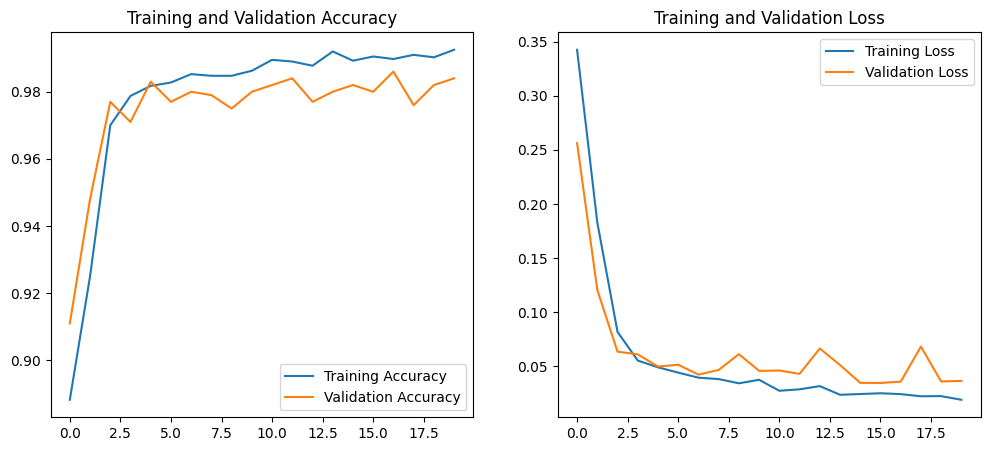

In [7]:
# Step 6: Training and evaluating the CNN model

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Model Test Accuracy: {accuracy * 100:.2f}%")

# Plotting training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Ali’s Breakdown of the Graphs




*   #   Training and Validation Accuracy:
What it shows: This graph displays the accuracy of the model during the training phase (on training data) and validation phase (on unseen test data). Accuracy measures the percentage of predictions the model got right.
Why it matters: High training accuracy indicates that the model is learning well from the dataset. However, high validation accuracy is crucial—it means the model not only learns but also generalizes its learning to new, unseen data. Ali keeps an eye on this to ensure there isn’t a significant gap between the two, which could indicate overfitting.
*   # Training and Validation Loss:
What it shows: The loss graph shows how the model’s prediction error decreases over time. Loss is a calculation of how far the model's predictions are from the actual values.
Why it matters: Decreasing loss is a good sign—it means the model is improving. However, if the validation loss starts increasing or diverges from the training loss, it could be a signal that the model is memorizing the training data too closely and not adapting well to new data.
*   # Ali’s Interpretation for ADNOC:
By analyzing these graphs, Ali provides ADNOC with confidence in the model’s predictive capabilities. The visuals allow him to confirm the model's reliability and adjust parameters if needed to avoid overfitting, ensuring the model remains robust and accurate. This step is pivotal because a reliable model means ADNOC can trust its predictions to make informed decisions on where to drill, optimizing resource allocation and maximizing potential returns.


# Conclusion: Turning Data into Decisions
Ali’s journey doesn’t end with just a model. The enhanced seismic data and the trained CNN are now valuable tools in ADNOC’s upstream decision-making process. By identifying oil reservoirs with greater accuracy, Ali has helped reduce unnecessary drilling.